#PENJELASAN SINGKAT PROJECT

---



In [1]:
!pip install albumentations==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 29.8 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=d0d56dad448754dd725474d7cf0fdd017a6a599064d106d6898c52bed8fae949
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


# **[1.INISIASI LIBRARY]**

In [2]:
import numpy as np
import pandas as pd
import os
import torch
import torchvision
import cv2 as cv
from pycocotools.coco import COCO
from torchvision import datasets, models
import matplotlib.pyplot as plt
import copy
from torchvision.utils import draw_bounding_boxes
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms import transforms as T
import math

##*-warnings.filterwarnings("ignore")* 
### berfungsi untuk mengabaikan semua peringatan
sumber : 

1.https://www.delftstack.com/howto/python/suppress-warnings-python/

2.https://www.pengembangan-web-mp-pd.com/id/python/menghilangkan-peringatan-dari-scikit-belajar/1055744856/

In [3]:
import warnings

warnings.filterwarnings("ignore")

##-memeriksa versi library torch dan torchvision
####pada penelitian ini pastikan 
    torch : 1.12.1+cu113
    torchvision : 0.13.1+cu113 

In [4]:
print(torch.__version__)
print(torchvision.__version__)
cv.getBuildInformation()

1.12.1+cu113
0.13.1+cu113


'\nGeneral configuration for OpenCV 4.6.0 =====================================\n  Version control:               unknown\n\n  Extra modules:\n    Location (extra):            /io/opencv_contrib/modules\n    Version control (extra):     unknown\n\n  Platform:\n    Timestamp:                   2022-06-07T10:28:32Z\n    Host:                        Linux 5.13.0-1025-azure x86_64\n    CMake:                       3.22.5\n    CMake generator:             Unix Makefiles\n    CMake build tool:            /bin/gmake\n    Configuration:               Release\n\n  CPU/HW features:\n    Baseline:                    SSE SSE2 SSE3\n      requested:                 SSE3\n    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX\n      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX\n      SSE4_1 (16 files):         + SSSE3 SSE4_1\n      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2\n      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX\n   

##-mengkoneksikan antara google colabs dan google drive pribaadi

In [5]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## -import dataset pada roboflow kedalam project google colabs
###code bisa di dapatkan melalui roboflow


In [6]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="RLpF5qnVG3u4wi0Hgkmg")
project = rf.workspace("diza-febriyan-hasal").project("maskdetection-tdrvn")
dataset = project.version(3).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 43.8 MB/s 
     |████████████████████████████████| 178 kB 64.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.7 MB/s 
     |████████████████████████████████| 67 kB 3.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 138 kB 71.0 MB/s 
     |████████████████████████████████| 62 kB 843 kB/s 
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=6f36cd7c854627c78b3c8b4d6f5da810f77c8a1b606aa85c033a0c2a3346071d
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0b39cffe068bc3eca9d101876320d72ee23f5133527ee1624ea362a2790a6c38
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to maskdetection-3 in coco:: 100%|██████████| 2265/2265 [00:00<00:00, 2333.33it/s]


# **[2.TRANSFORM DATASET]**
menyimpan operasi pengambilan dataset dan fungsi transform dataset dari array image ke bentuk tensor


    coc = COCO(os.path.join(dataset_path,"train","_annotations.coco.json"))  
-coc = memuat lokasi coco dataset kedalam sebuah format struktur data baru dengan fungsi COCO sebagai pembantu untuk mengakses data lebih mudah.

    for i in categories.items():
    classes.append(i[1]["name"])

Melakukan import nama class atau objek anotasi kedalam sebuah variabel baru yaitu "classes"

In [7]:
# dataset_path="/content/drive/MyDrive/projectTA2/datasetcoco"
# coc = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json")) ini code untuk akses via google drive
dataset_path = "/content/maskdetection-3"
coc = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
categories = (
    coc.cats
)  # menyimpan kategori atau class suatu data seperti disini menyimpan data dengan nama objek yaitu Mask
images = (
    coc.imgs
)  # menyimpan data data informasi mnengenai gambar seperti dibawah terdapat informasi nama, ukuran gambar dsbg
annotations = (
    coc.anns
)  # menyimpan informasi mengenai nama data dan informasi mengenai label dalam suatu data
n_classes = len(categories.keys())

classes = []
for i in categories.items():
    classes.append(i[1]["name"])


def get_albumentation():
    transform = A.Compose([ToTensorV2()], bbox_params=A.BboxParams(format="coco"))

    return transform

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


#**3 [FUNGSI PREROCESSING DATA]**

    def __init__ (self,root,split='train', transforms = None, target_transform=None):

def "init" berfungsi untuk menginisiasi data kedalam sebuah variabel


-root : lokasi dataset

-split : informasi dataset apakah "train", "valid" atau "test"

-transforms : menyimpan fungsi konversi suatu data kedalam format tensor

-coco : fungsi mengimport COCO annotation file dan mempersiapkan structure data

-ids : membuat list array informasi ID seluruh dataset sesuai dengan classnya (train/valid/test)

    def _load_target(self, id):
-mengimport anotasi atau boundingbox dataset citra

    def __getitem__ (self,idx: int):

-fungsi get item termasuk kedalam magic method, berfungsi untuk mengambil seluruh dataset coco dan memproses agar siap untuk di gunakan / di panggil

penggunaan pemanggilan fungsi `train_dataset[1]` akan sama hasilnya dengan memanggil fungsi `train_dataset.__getitem__(1)`



-penjelasan penggunaan fungsi getitem : 

1. https://stackoverflow.com/questions/43627405/understanding-getitem-method 
2. https://jagongoding.com/python/menengah/oop/magic-method/#:~:text=Fungsi%20__getitem__()%20adalah%20sebuah,diapit%20dengan%20kurung%20siku%20%5B%5D%20.


    def __len__ (self):
-mengetahui total dataset dalam sebuah class



sumber : https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py

In [8]:
class MaskDetection(datasets.VisionDataset):
    def __init__(self, root, split="train", transforms=None, target_transform=None):
        self.root = root
        self.split = split
        self.transforms = transforms
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json"))
        self.ids = list(sorted(self.coco.imgs.keys()))

    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, idx: int):
        id = self.ids[idx]
        anotasi_img = self._load_target(idx)
        anotasi_img = copy.deepcopy(self._load_target(idx))
        imgpath = self.coco.loadImgs(id)[0]["file_name"]
        image = cv.imread(os.path.join(self.root, self.split, imgpath))
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        num_objek = len(anotasi_img)

        boxes = [t["bbox"] + [t["category_id"]] for t in anotasi_img]
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)

        image = transformed["image"]
        boxes = transformed["bboxes"]

        # fungsi untuk memanggil data gambar dan memvisualisasikannya

        boxes = []
        for i in range(
            num_objek
        ):  # akan dilakukan perulangan jika objek di dalam satu gambar terdapat banyak atau lebih dari satu
            xmin = anotasi_img[i]["bbox"][0]
            ymin = anotasi_img[i]["bbox"][1]
            xmax = xmin + anotasi_img[i]["bbox"][2]
            ymax = ymin + anotasi_img[i]["bbox"][3]
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.ones((num_objek,), dtype=torch.int64)

        id = torch.tensor([id])

        areas = []
        for i in range(num_objek):
            areas.append(anotasi_img[i]["area"])
        areas = torch.as_tensor(areas, dtype=torch.float32)

        iscrowd = torch.zeros((num_objek,), dtype=torch.float64)

        my_annotation = {}
        my_annotation["boxes"] = boxes
        my_annotation["labels"] = labels
        my_annotation["image_id"] = id
        my_annotation["area"] = areas
        my_annotation["iscrowd"] = iscrowd
        return image.div(255), my_annotation

    def __len__(self):
        return len(self.ids)

proses ini untuk memasukkan list index dataset kedalam sebuah variabel, dataset tersebut dibagi menjadi 3 yaitu "train_dataset" "val_dataset" dan "test_dataset"

In [9]:
train_dataset = MaskDetection(root=dataset_path, transforms=get_albumentation())
val_dataset = MaskDetection(
    root=dataset_path, split="valid", transforms=get_albumentation()
)
test_dataset = MaskDetection(
    root=dataset_path, split="test", transforms=get_albumentation()
)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [10]:
len(train_dataset), len(val_dataset), len(
    test_dataset
)  # untuk memastikan panjang dataset sesuai dengan dataset kita

(1974, 188, 95)

sample : menerima dataset untuk mencoba memvisualisasikan dataset apakah sesuai dengan dataset yang kita miliki.

img_init : menormalisasi dataset


sumber draw_bounding_boxes : https://www.tutorialspoint.com/how-to-draw-bounding-boxes-on-an-image-in-pytorch

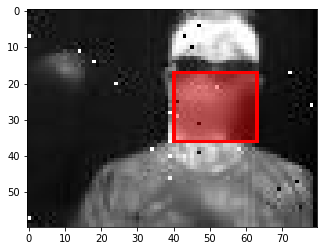

In [11]:
sample = train_dataset[4]
img_int = torch.tensor(sample[0] * 255, dtype=torch.uint8)
plt.imshow(
    draw_bounding_boxes(
        img_int, sample[1]["boxes"], width=1, colors=(255, 0, 0), fill=True
    ).permute(1, 2, 0)
)

#**4 [MODEL DAN INISIASI TRAIN]**

In [12]:
# FUNGSI PEMBUATAN BATCH DATASET
def collate_fn(batch):
    return tuple(zip(*batch))

In [13]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = (
    torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, n_classes)
)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [14]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn
)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=collate_fn
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=collate_fn
)

dijalankan untuk keperluan cobacoba

In [15]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [16]:
!nvidia-smi

Sun Sep 11 09:26:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
model = model.to(device)

In [18]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4
)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer, milestones=[16, 22], gamma=0.1
)

In [19]:
# Fungsi animasi loading
from tqdm import tqdm

In [20]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.to(device)
    model.train()
    header = "Epoch: [{}]".format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = torch.optim.lr_scheduler.LinearLR(
            optimizer, start_factor=warmup_factor, total_iters=warmup_iters
        )

    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(data_loader):
        images = list(image.to(device) for image in images)
        targets = [
            {k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets
        ]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())

        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        losses_reduced = sum(loss for loss in loss_dict.values())

        loss_value = losses_reduced.item()

        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

    all_losses_dict = pd.DataFrame(all_losses_dict)
    print(
        "Epoch {}: lr: {:.6f} loss: {:.6f}, loss_classifier: {:.6f}, loss_box_reg: {:.6f}, loss_rpn_box_reg: {:6f}, loss_objectness: {:.6f}".format(
            epoch,
            optimizer.param_groups[0]["lr"],
            np.mean(all_losses),
            all_losses_dict["loss_classifier"].mean(),
            all_losses_dict["loss_box_reg"].mean(),
            all_losses_dict["loss_rpn_box_reg"].mean(),
            all_losses_dict["loss_objectness"].mean(),
        )
    )

In [21]:
num_epochs = 10

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=28)
    lr_scheduler.step()

100%|██████████| 494/494 [08:04<00:00,  1.02it/s]


Epoch 0: lr: 0.010000 loss: 0.111850, loss_classifier: 0.044652, loss_box_reg: 0.062054, loss_rpn_box_reg: 0.002085, loss_objectness: 0.003059


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 1: lr: 0.010000 loss: 0.040389, loss_classifier: 0.012205, loss_box_reg: 0.027116, loss_rpn_box_reg: 0.000733, loss_objectness: 0.000335


100%|██████████| 494/494 [08:11<00:00,  1.01it/s]


Epoch 2: lr: 0.010000 loss: 0.027464, loss_classifier: 0.009031, loss_box_reg: 0.017793, loss_rpn_box_reg: 0.000487, loss_objectness: 0.000153


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 3: lr: 0.010000 loss: 0.021208, loss_classifier: 0.007349, loss_box_reg: 0.013337, loss_rpn_box_reg: 0.000373, loss_objectness: 0.000149


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 4: lr: 0.010000 loss: 0.017407, loss_classifier: 0.006270, loss_box_reg: 0.010747, loss_rpn_box_reg: 0.000305, loss_objectness: 0.000086


100%|██████████| 494/494 [08:11<00:00,  1.01it/s]


Epoch 5: lr: 0.010000 loss: 0.014476, loss_classifier: 0.005439, loss_box_reg: 0.008716, loss_rpn_box_reg: 0.000255, loss_objectness: 0.000066


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 6: lr: 0.010000 loss: 0.012766, loss_classifier: 0.005071, loss_box_reg: 0.007401, loss_rpn_box_reg: 0.000222, loss_objectness: 0.000072


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 7: lr: 0.010000 loss: 0.011216, loss_classifier: 0.004694, loss_box_reg: 0.006271, loss_rpn_box_reg: 0.000201, loss_objectness: 0.000051


100%|██████████| 494/494 [08:10<00:00,  1.01it/s]


Epoch 8: lr: 0.010000 loss: 0.009974, loss_classifier: 0.004286, loss_box_reg: 0.005469, loss_rpn_box_reg: 0.000180, loss_objectness: 0.000040


100%|██████████| 494/494 [08:09<00:00,  1.01it/s]

Epoch 9: lr: 0.010000 loss: 0.008977, loss_classifier: 0.004022, loss_box_reg: 0.004736, loss_rpn_box_reg: 0.000164, loss_objectness: 0.000056


In [22]:
model.eval()
torch.cuda.empty_cache()

In [31]:
dataset = 23
testing = test_dataset[dataset]
img, _ = test_dataset[dataset]
img_int = torch.tensor(img * 255, dtype=torch.uint8)
with torch.no_grad():
    prediction = model([img.to(device)])
    pred = prediction[0]
    print(pred["scores"])

<class 'dict'>
<class 'torch.Tensor'>
tensor([1.0000], device='cuda:0')


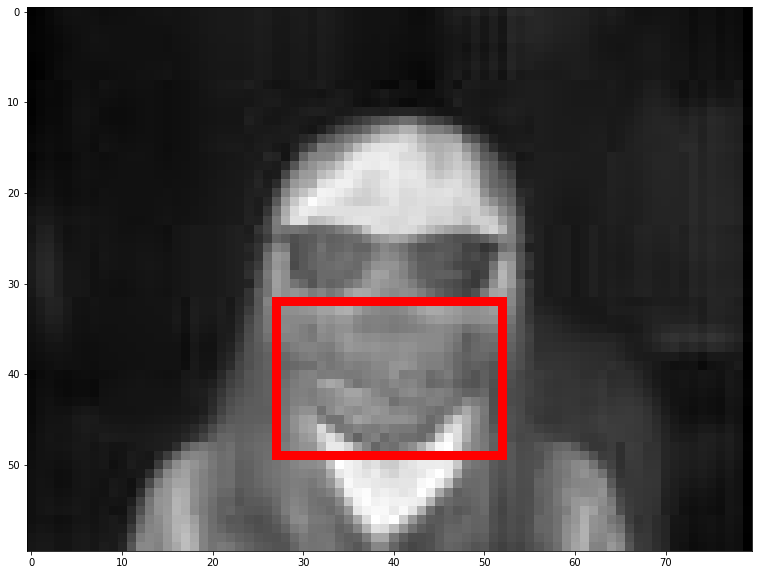

In [37]:
fig = plt.figure(figsize=(14, 10))
# plt.imshow(draw_bounding_boxes(img_int,
#                                pred['boxes'][pred['scores'] > 0.8],
#                                [classes[i] for i in pred['labels'][pred['scores'] > 0.8].tolist()],
#                                width=1).permute(1, 2, 0)
#           )

plt.imshow(
    draw_bounding_boxes(
        img_int, pred["boxes"][pred["scores"] > 0.8], width=1, colors=(255, 0, 0)
    ).permute(1, 2, 0)
)

In [38]:
torch.save(model, "test.pt")

In [39]:
##testing object detection

In [40]:
obj = torch.load("test.pt")
obj.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [41]:
img, _ = test_dataset[23]
img_int = torch.tensor(img * 255, dtype=torch.uint8)
with torch.no_grad():
    prediction = obj([img.to(device)])
    pred = prediction[0]
print(pred)

{'boxes': tensor([[27.2408, 32.4890, 52.3299, 49.1998]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([1.0000], device='cuda:0')}


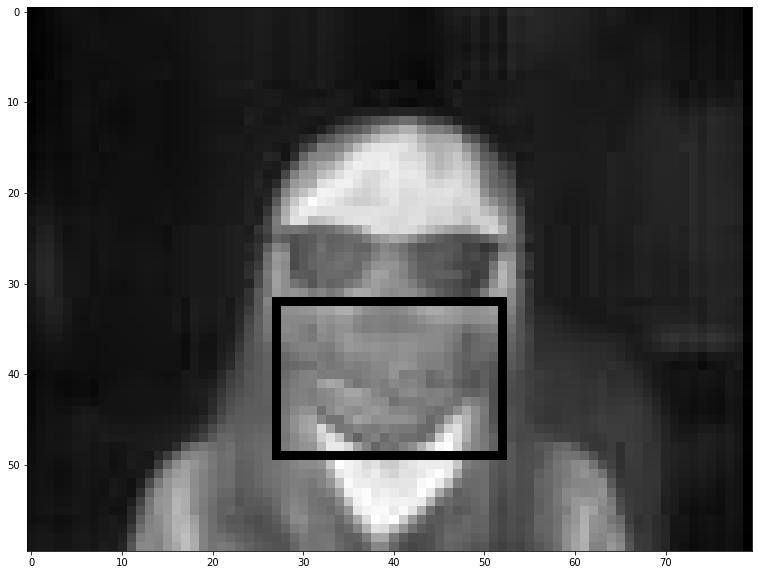

In [42]:
fig = plt.figure(figsize=(14, 10))
plt.imshow(
    draw_bounding_boxes(img_int, pred["boxes"][pred["scores"] > 0.8], width=1).permute(
        1, 2, 0
    )
)

In [43]:
dataset = 23
testing = test_dataset[dataset]
print(testing[1]["boxes"])
a = testing[1]["boxes"].numpy()
print(a)
print(pred["boxes"])
b = pred["boxes"].cpu().numpy()
print(b)

tensor([[29.0000, 32.0000, 52.0600, 49.2200]])
[[29.   32.   52.06 49.22]]
tensor([[27.2408, 32.4890, 52.3299, 49.1998]], device='cuda:0')
[[27.240816 32.48901  52.32989  49.199802]]
